### A. Ideal polymer. 

1. Implement a growing algorithm of an ideal polymer as a random walk process on 
(i) a square lattice (2D); 
(ii) a cubic lattice (3D). 

You can assume, without loss of generality, that the first monomer is at (0,0,0) and the second is at (1,0,0). 

(a) Calculate the dependence of R2 P and R2 g on the number of monomers for N < Nmax = 100. Plot your results. 

(b) Extract the exponent ν defined in Eq. 3. Do your calculations considering a number of at least M = 1000 independent realizations of your polymers.

In [134]:
import numpy as np
import random

# ------ 2D square lattice ---------------------

def generate_ideal_2D(N, R):
    'Generates an ideal chain 2D with N monomers and initial positions R'

    displacements = [np.array([1,0]), np.array([-1,0]), np.array([0,1]), np.array([0,-1])]  
    # 4 possible moves
    
    R_new = R.copy()
    for _ in range(N-2):
        x = random.randint(0, 3)     # Random direction, x is the index
        new_pos = np.array(R_new[-1] + displacements[x])
        R_new.append(new_pos)

    return R_new

def generate_ideal_3D(N, R):
    'Generates an ideal chain 3D with N monomers and initial positions R'

    displacements = [np.array([1,0,0]), np.array([-1,0,0]), 
                     np.array([0,1,0]), np.array([0,-1,0]),
                     np.array([0,0,1]), np.array([0,0,-1])]  
    # 6 possible moves
    
    R_new = R.copy()
    for _ in range(N-2):
        x = random.randint(0, 5)     # Random direction, x is the index
        new_pos = np.array(R_new[-1] + displacements[x])
        R_new.append(new_pos)

    return R_new

# --------------------------------------------------
# Observables: <R_P^2>(N) and <R_g^2>(N) for a set
# --------------------------------------------------

def end_to_end_squared(R):
    """
    R: list of np.array positions of all monomers
    Returns the squared end-to-end distance.
    """
    return np.sum((R[-1] - R[0])**2)

def radius_of_gyration_squared(R):
    """
    R: list of np.array positions of all monomers
    Returns the squared radius of gyration.
    """
    R_arr = np.array(R)                     # shape (N, dim)
    Rcm = np.mean(R_arr, axis=0)            # center of mass
    return np.mean(np.sum((R_arr - Rcm)**2, axis=1))


In [135]:
R2 = [np.array([0,0]), np.array([1,0])]   # vector storing the x,y positions of the i-th monomer
R3 = [np.array([0,0,0]), np.array([1,0,0])]

R = generate_ideal_3D(3,R3)

print("R_P² =", end_to_end_squared(R))
print("R_g² =", radius_of_gyration_squared(R))


R_P² = 4
R_g² = 0.6666666666666666


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

# ============================================================
# 2D polymer visualization
# ============================================================

def plot_polymer_2D(R):
    """
    R: list of np.array([x, y]) positions
    Draws the polymer chain in 2D with dark dots and connected edges.
    """
    R_arr = np.array(R)
    x, y = R_arr[:, 0], R_arr[:, 1]

    plt.figure(figsize=(5,5), dpi = 400)
    plt.plot(x, y, '-', color='blue', lw=1.5, alpha=0.8)    # edges
    plt.scatter(x, y, s=25, color='violet', zorder=3)          # monomers

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polymer chain (2D)", fontsize = 14)
    plt.axis('equal')
    plt.grid(True, ls='--', alpha=0.3)
    plt.tight_layout()
    #plt.savefig('2Dpolymer', dpi=400)
    plt.show()

# ============================================================
# 3D polymer visualization
# ============================================================

def plot_polymer_3D(R):
    """
    R: list of np.array([x, y, z]) positions
    Draws the polymer chain in 3D with dark dots and highlighted edges.
    """
    R_arr = np.array(R)
    x, y, z = R_arr[:, 0], R_arr[:, 1], R_arr[:, 2]

    fig = plt.figure(figsize=(5,5), dpi = 400)
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x, y, z, '-', color='blue', lw=1.5, alpha=0.8)   # edges
    ax.scatter(x, y, z, s=25, color='violet', depthshade=True) # monomers

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title("Polymer chain (3D)", fontsize = 14)
    ax.grid(True)

    # Adjust view for better visual balance
    ax.view_init(elev=20, azim=45)
    plt.tight_layout()
    #plt.savefig('3Dpolymer', dpi=400)
    plt.show()

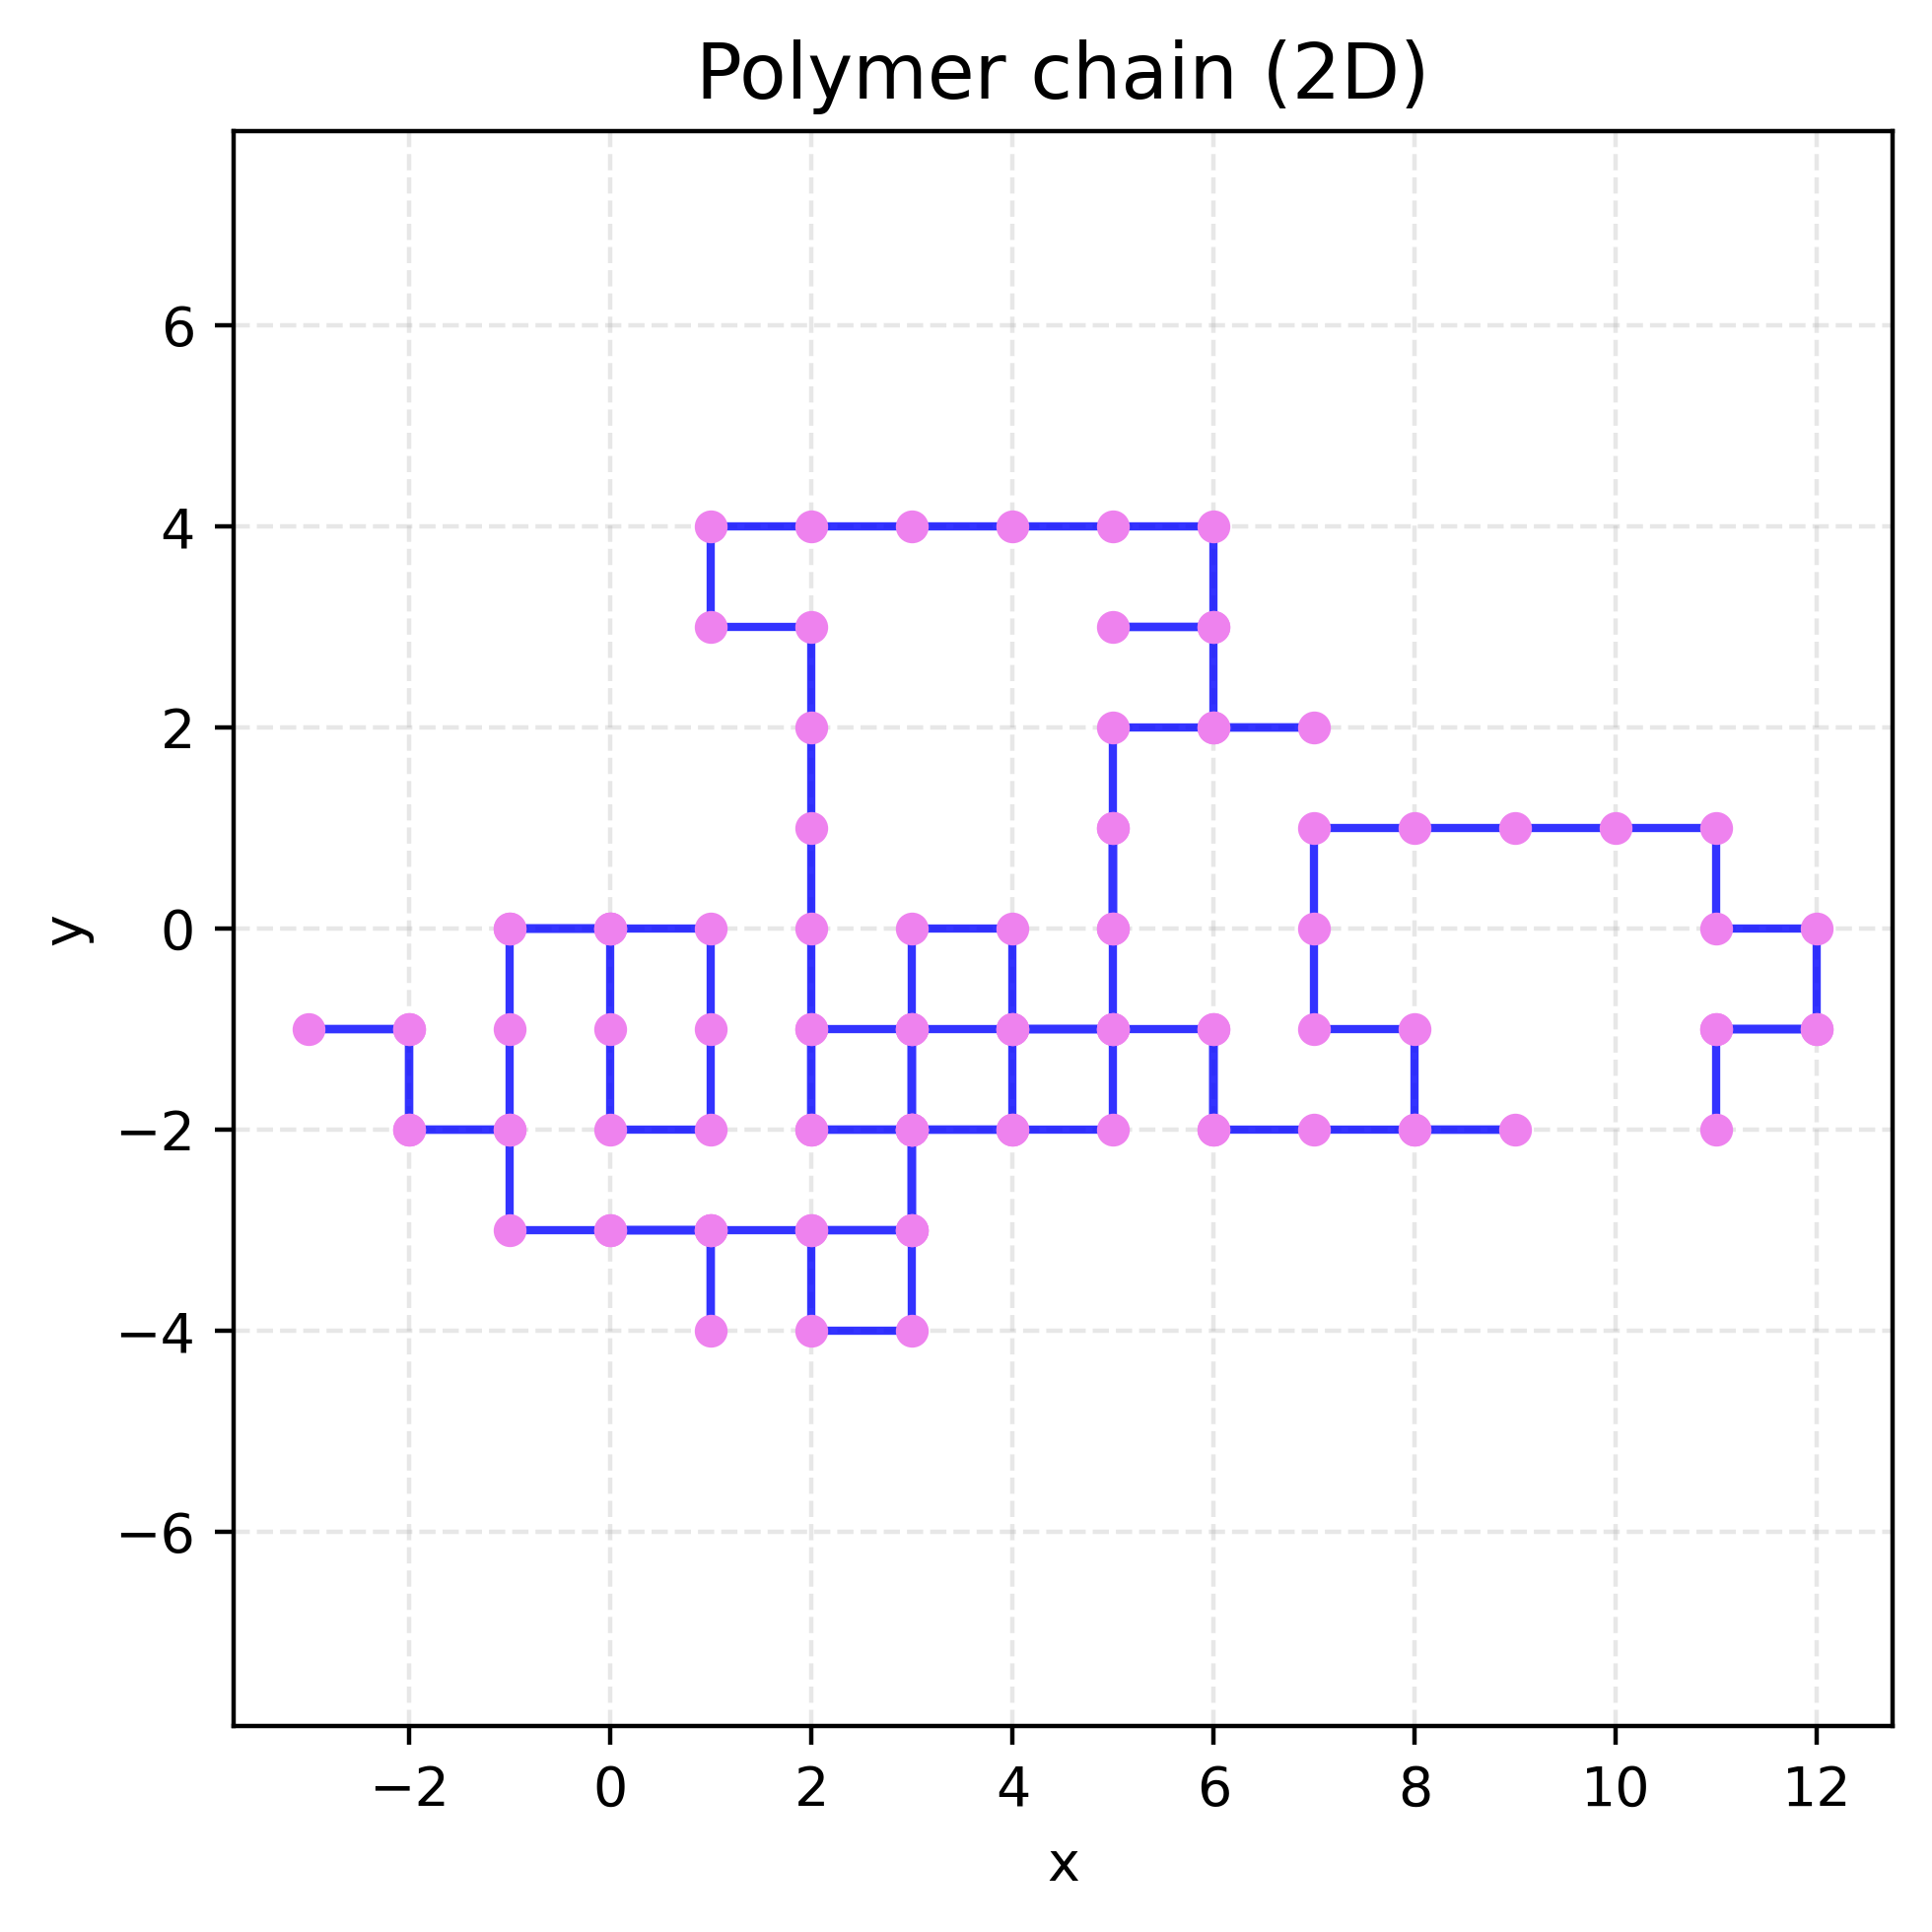

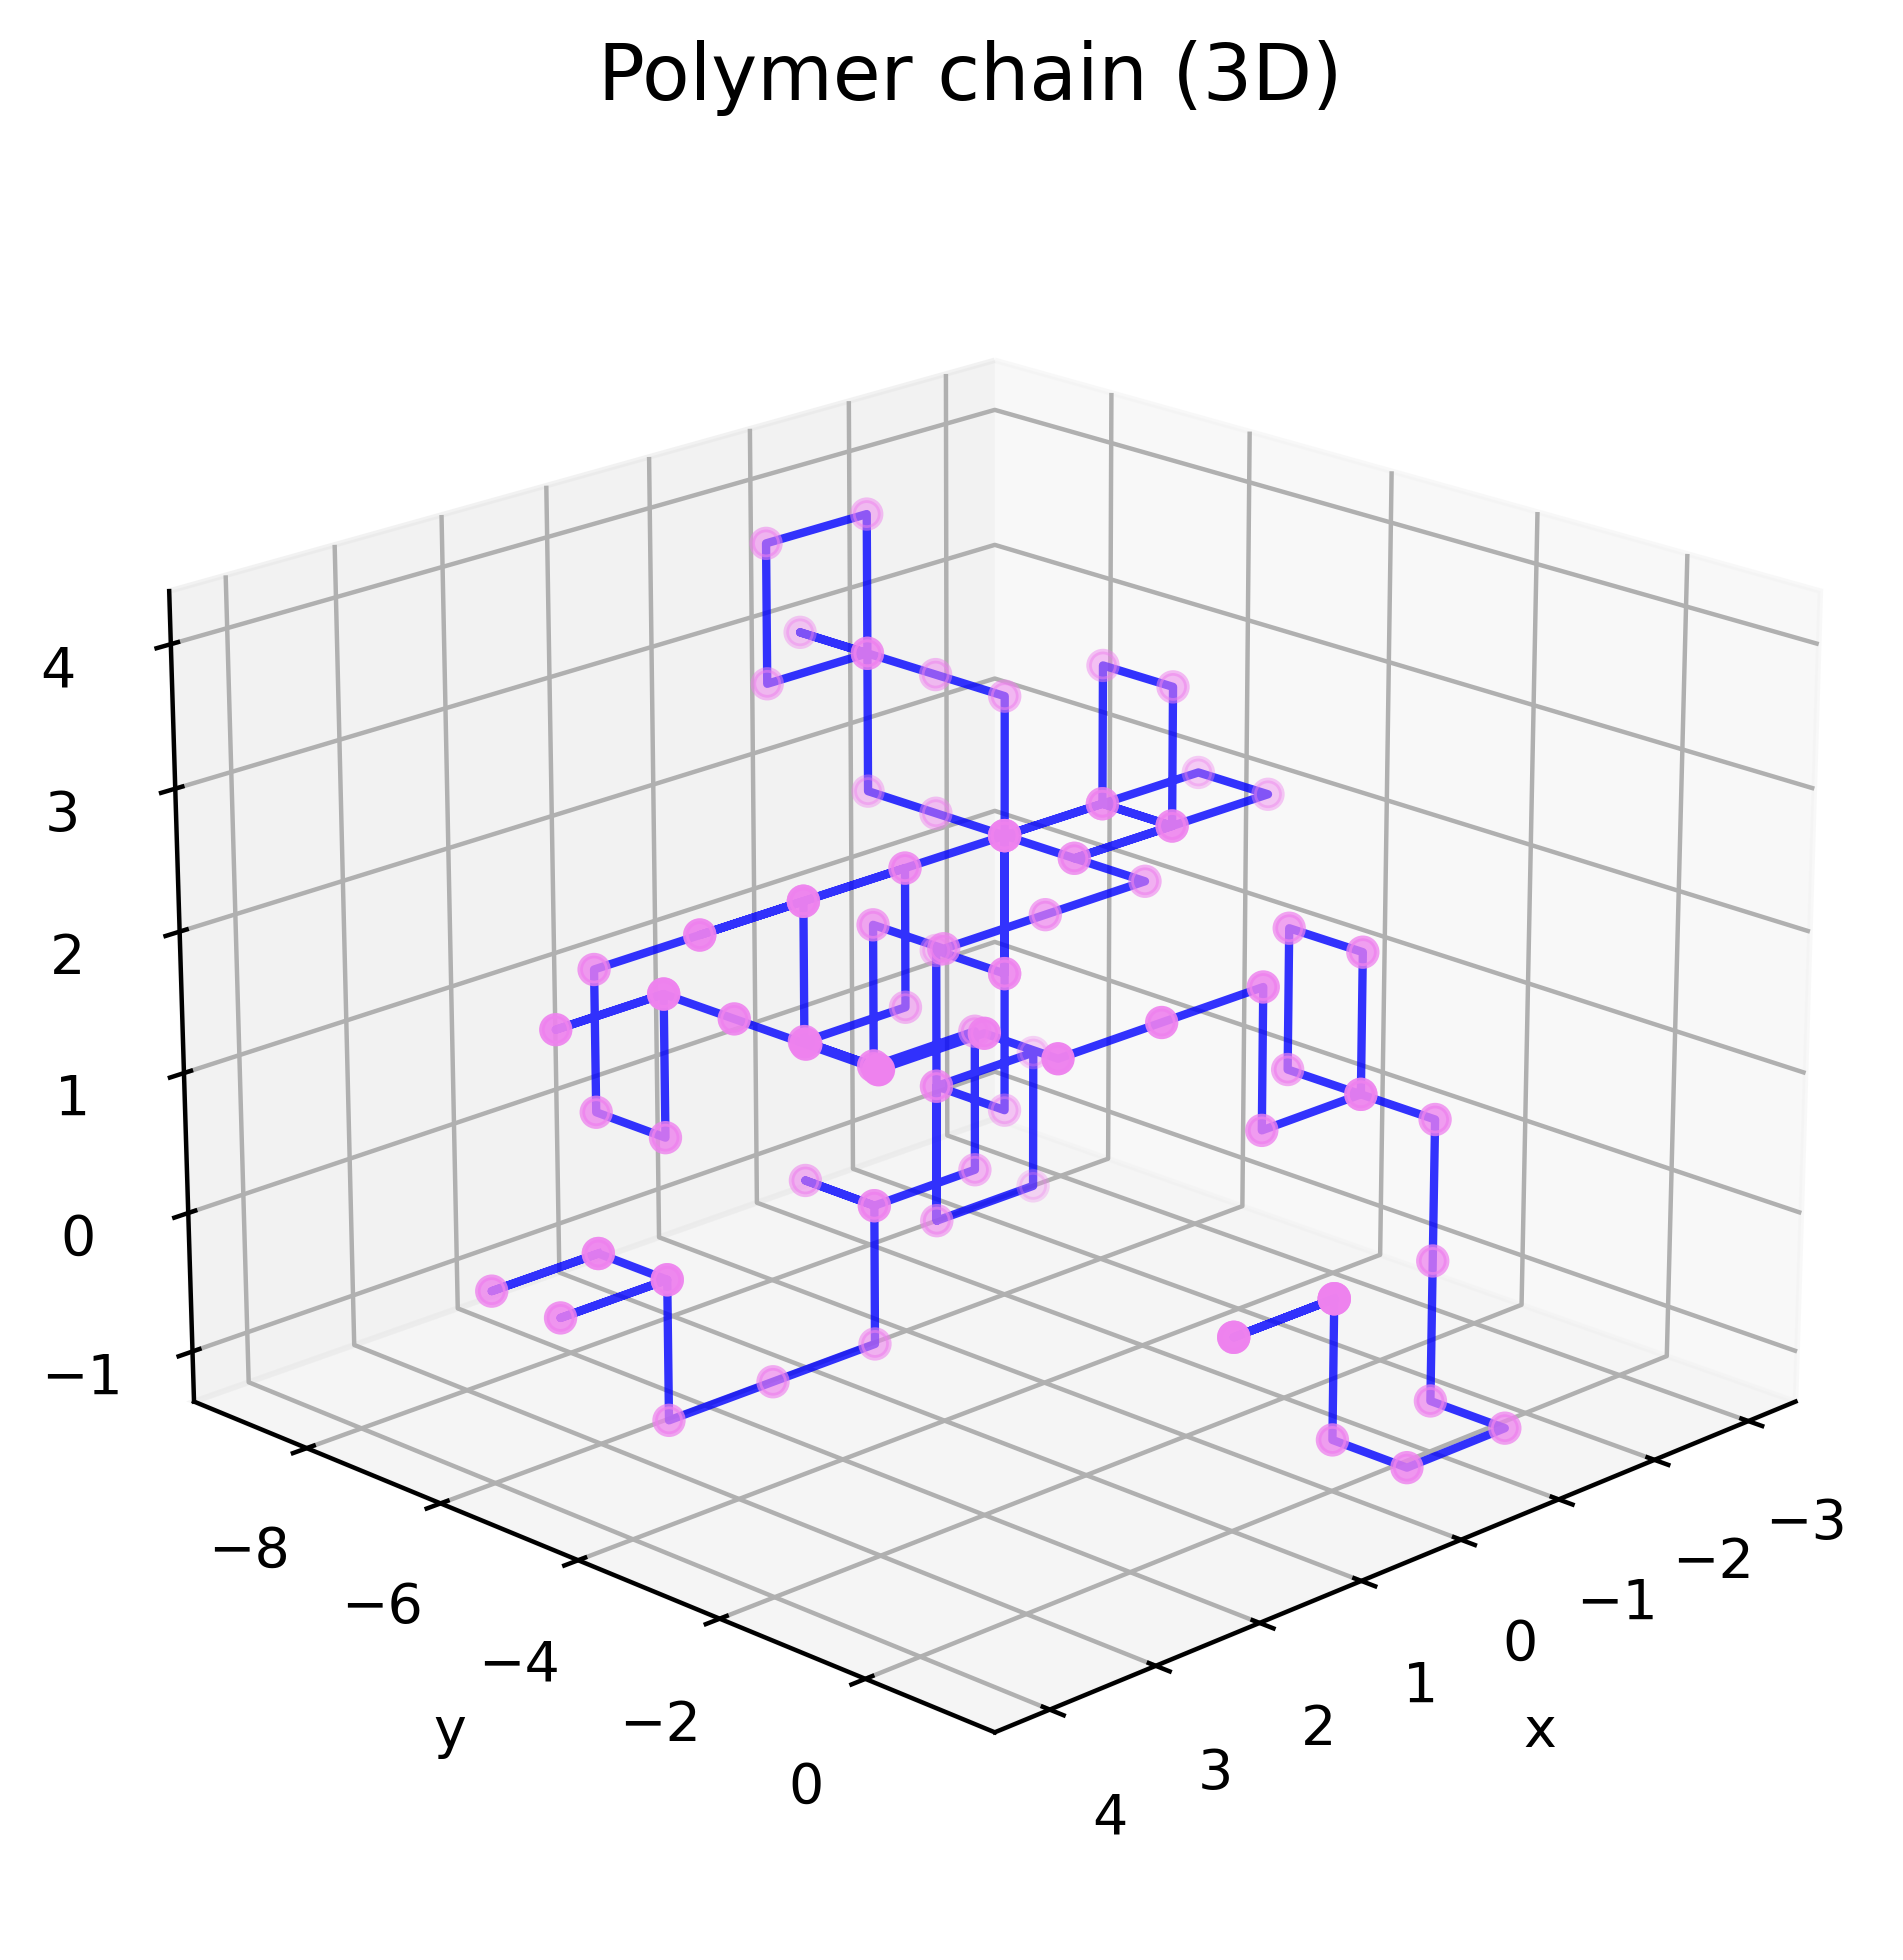

In [173]:
R2 = [np.array([0,0]), np.array([1,0])]   # vector storing the x,y positions of the i-th monomer
R3 = [np.array([0,0,0]), np.array([1,0,0])]
N = 100 #number of monomers

R2_complete = generate_ideal_2D(N,R2)
R3_complete = generate_ideal_3D(N,R3)

plot_polymer_2D(R2_complete)
plot_polymer_3D(R3_complete)

In [136]:
# ------Avering over M realizations---------------
from tqdm import tqdm

def radius_N(Nmax,Mmax,dim):
    Rp_list = []
    Rg_list = []
    Rp_stores = []
    Rg_stores = []
    N_list = list(range(2, Nmax+1))

    for N in tqdm(N_list, desc="Simulant cadenes", ncols=80):
        Rp_stores = []
        Rg_stores = []
        for _ in range(Mmax):
            if dim == 2:
                R = generate_ideal_2D(N, R2)
            if dim == 3:
                R = generate_ideal_3D(N, R3)
            Rp_stores.append(end_to_end_squared(R))
            Rg_stores.append(radius_of_gyration_squared(R))

        Rp_list.append(float(np.mean(Rp_stores)))
        Rg_list.append(float(np.mean(Rg_stores)))

    return N_list, Rp_list, Rg_list

In [174]:
R2 = [np.array([0,0]), np.array([1,0])]   # vector storing the x,y positions of the i-th monomer
R3 = [np.array([0,0,0]), np.array([1,0,0])]
Nmax = 100
Mmax = 100000
dim = 3

N_list, Rp_list, Rg_list = radius_N(Nmax,Mmax,dim)

Simulant cadenes: 100%|█████████████████████████| 99/99 [27:49<00:00, 16.87s/it]


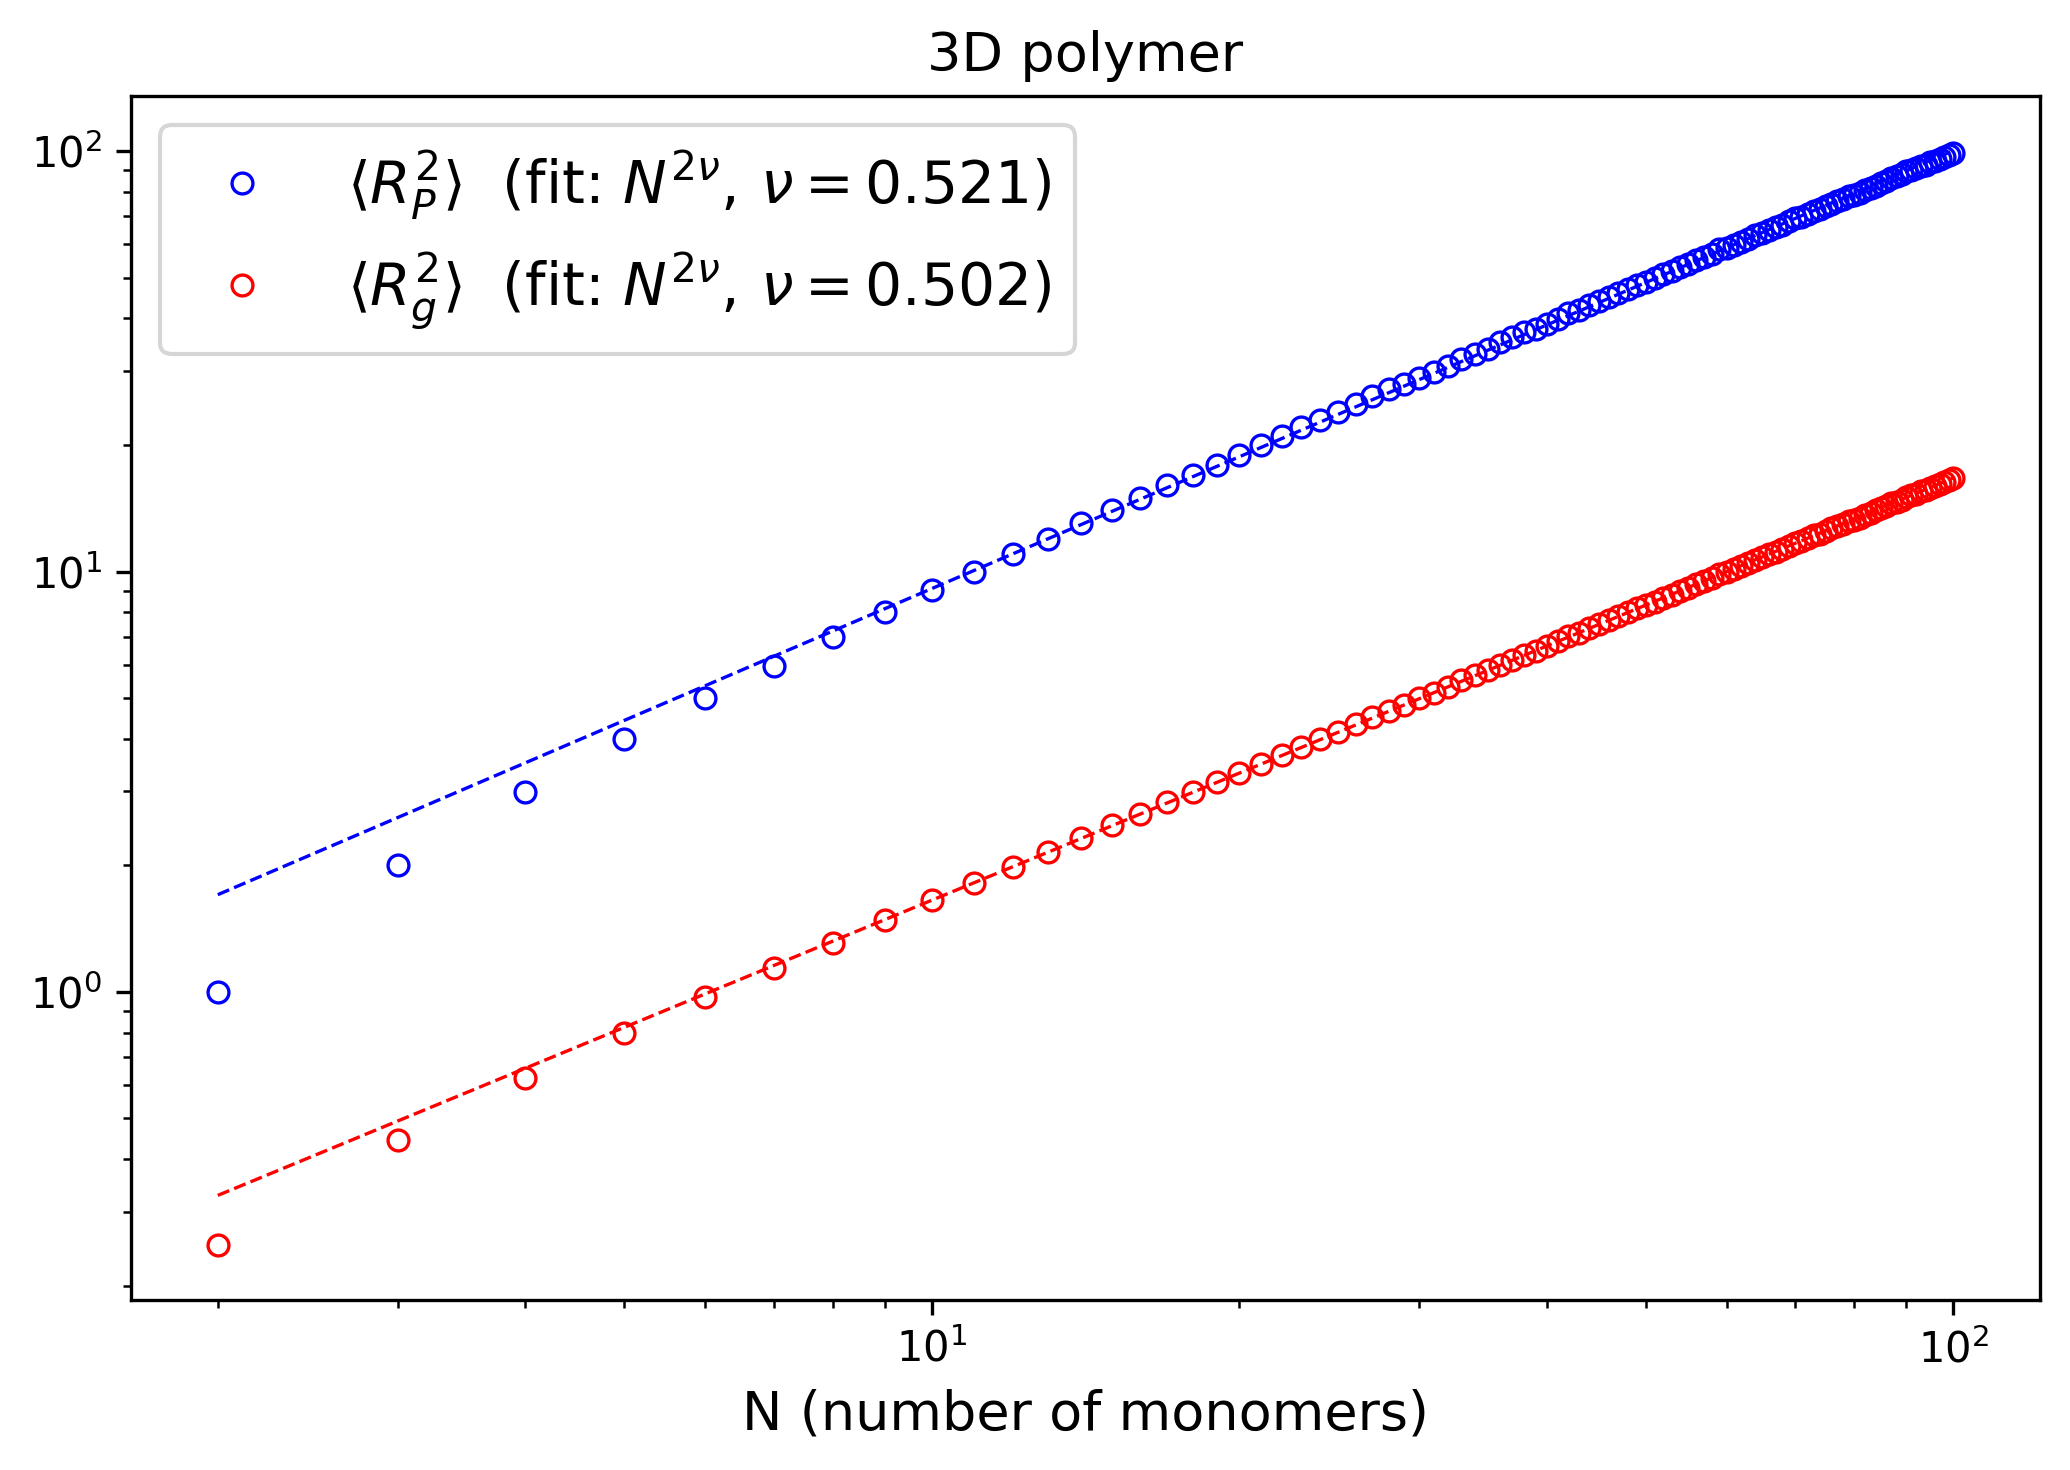

In [ ]:
def plot_radii(N_list, Rp_list, Rg_list):
    N = np.array(N_list)

    # ----- Fit log-log regression for both -----
    mask = N > 5  # exclude small N to reduce finite-size effects
    x = np.log(N[mask])

    # Fit RP² ~ a N^{2ν}
    yP = np.log(np.array(Rp_list)[mask])
    slopeP, interceptP = np.polyfit(x, yP, 1)
    nuP = slopeP / 2
    aP = np.exp(interceptP)

    # Fit RG² ~ a N^{2ν}
    yG = np.log(np.array(Rg_list)[mask])
    slopeG, interceptG = np.polyfit(x, yG, 1)
    nuG = slopeG / 2
    aG = np.exp(interceptG)

    # ----- Plot -----
    plt.figure(figsize=(7,5), dpi = 300)

    # Empirical data: hollow circles
    plt.loglog(N, Rp_list, 'o', mfc='none', mec='blue', mew=0.8, ms=5, 
               label=fr'$\langle R_P^2\rangle$  (fit: $N^{{2\nu}},\,\nu={nuP:.3f}$)')
    plt.loglog(N, Rg_list, 'o', mfc='none', mec='red', mew=0.8, ms=5, 
               label=fr'$\langle R_g^2\rangle$  (fit: $N^{{2\nu}},\,\nu={nuG:.3f}$)')

    # Regression lines: thin solid
    plt.loglog(N, aP * N**(2*nuP), '--', lw=0.8, color = 'blue')
    plt.loglog(N, aG * N**(2*nuG), '--', lw=0.8, color = 'red')

    # Labels and style
    plt.xlabel("N (number of monomers)", fontsize=13)
    plt.title("3D polymer", fontsize=13)
    plt.legend(fontsize=14)
    plt.tight_layout()
    #plt.savefig('SizeScaling3D', dpi=400)
    plt.show()

plot_radii(N_list, Rp_list, Rg_list)
